In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
anes96 = sm.datasets.anes96
print(anes96.NOTE)

::

    Number of observations - 944
    Number of variables - 10

    Variables name definitions::

            popul - Census place population in 1000s
            TVnews - Number of times per week that respondent watches TV news.
            PID - Party identification of respondent.
                0 - Strong Democrat
                1 - Weak Democrat
                2 - Independent-Democrat
                3 - Independent-Indpendent
                4 - Independent-Republican
                5 - Weak Republican
                6 - Strong Republican
            age : Age of respondent.
            educ - Education level of respondent
                1 - 1-8 grades
                2 - Some high school
                3 - High school graduate
                4 - Some college
                5 - College degree
                6 - Master's degree
                7 - PhD
            income - Income of household
                1  - None or less than $2,999
                2  - $3,000-$4,9

In [3]:
dataset_anes96 = anes96.load_pandas()
df = dataset_anes96.data

## 1. DataFrame Basic Properties Exercise

Our DataFrame (`df`) contains data on registered voters in the United States, including demographic information and political preference. Using `pandas`, print the first 5 rows of the DataFrame to get a sense of what the data looks like. Next, answer the following questions:


*   How many observations are in the DataFrame?
*   How many variables are measured (how many columns)?
*   What is the age of the youngest person in the data? The oldest?
*   How many days a week does the average respondent watch TV news (round to the nearest tenth)?
*   Check for missing values. Are there any?


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   popul     944 non-null    float64
 1   TVnews    944 non-null    float64
 2   selfLR    944 non-null    float64
 3   ClinLR    944 non-null    float64
 4   DoleLR    944 non-null    float64
 5   PID       944 non-null    float64
 6   age       944 non-null    float64
 7   educ      944 non-null    float64
 8   income    944 non-null    float64
 9   vote      944 non-null    float64
 10  logpopul  944 non-null    float64
dtypes: float64(11)
memory usage: 81.2 KB


In [5]:
df.age.min()

19.0

In [6]:
df.age.max()

91.0

In [7]:
df.TVnews.mean().round(1)

3.7

In [8]:
df.isna().sum().sum()

0

**There is 944 observations, no missing values and, there is 11 variables. The youngest person is 19 and the oldest 91. the respondent watch news in average 3.7 days per week.**

## 2. Data Processing Exercise

We want to adjust the dataset for our use. Do the following:


*   Rename the `educ` column `education`.
*   Create a new column called `party` based on each respondent's answer to `PID`. `party` should equal `Democrat` if the respondent selected either Strong Democrat or Weak Democrat. `party` will equal `Republican` if the respondent selected Strong or Weak Republican for `PID` and `Independent` if they selected anything else.
*   Create a new column called `age_group` that buckets respondents into the following categories based on their `age`: 18-24, 25-34, 35-44, 45-54, 55-64, and 65 and over. 



In [9]:
df = df.rename(columns = {'educ':'education'})

In [10]:
df["party"] = df.PID.copy()

In [11]:
df.loc[df.party.isin([0,1,2]), "party"] = "democrat"

In [12]:
df.loc[df.party == 3, "party"] = "independent"

In [13]:
df.loc[df.party.isin([4,5,6]), "party"] = "republican"

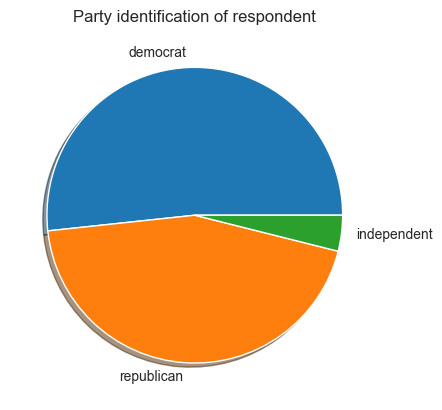

In [22]:
plt.pie(x = df.party.value_counts(), shadow = True, labels = df.party.value_counts().index )
plt.title('Party identification of respondent')
plt.show()

In [15]:
df['age_group'] = df.age.copy()

In [16]:
df.loc[df.age_group.isin(np.arange(18,25)), 'age_group'] = '18-24'

In [17]:
df.loc[df.age_group.isin(np.arange(25,35)), 'age_group'] = '25-34'

In [18]:
df.loc[df.age_group.isin(np.arange(35,45)), 'age_group'] = '35-44'
df.loc[df.age_group.isin(np.arange(45,55)), 'age_group'] = '45-54'
df.loc[df.age_group.isin(np.arange(55,65)), 'age_group'] = '55-64'
df.loc[df.age_group.isin(np.arange(65,150)) , 'age_group'] = '65 and over'

<AxesSubplot: xlabel='age_group', ylabel='count'>

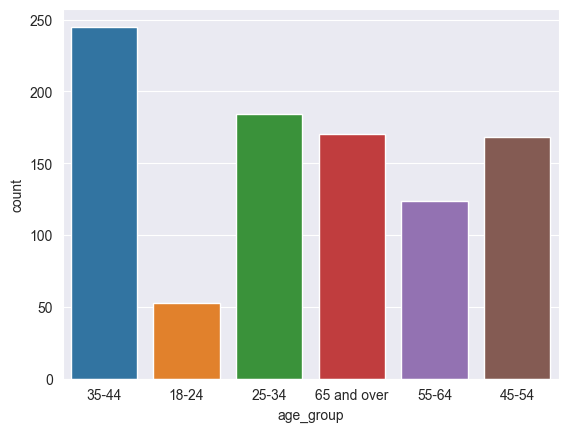

In [20]:
sns.set_style("darkgrid")
sns.countplot(x = 'age_group', data =df)

## 3. Filtering Data Exercise

Use the filtering method to find all the respondents who have the impression that Bill Clinton is moderate or conservative (`ClinLR` equals 4 or higher). How many respondents are in this subset? 

Among these respondents, how many have a household income less than $50,000 and attended at least some college?

In [23]:
df[df.ClinLR >= 4].count()

popul        282
TVnews       282
selfLR       282
ClinLR       282
DoleLR       282
PID          282
age          282
education    282
income       282
vote         282
logpopul     282
party        282
age_group    282
dtype: int64

In [24]:
df[(df.ClinLR >= 4) & (df.income < 20) & (df.education > 3)].count()

popul        98
TVnews       98
selfLR       98
ClinLR       98
DoleLR       98
PID          98
age          98
education    98
income       98
vote         98
logpopul     98
party        98
age_group    98
dtype: int64

## 4. Calculating From Data Exercise

For each of the below match-ups, choose the group that is more likely to vote for Bill Clinton. You can calculate this using the percentage of each group that intends to vote for Clinton (`vote`). Which match-up was the closest? Which had the biggest difference?

Another way to think about this: Given that a respondent is a Democrat, there is a ____ percent chance they will vote for Clinton. How does this value change if the respondent is a Republican?

*   Democrats or Republicans
*   People younger than 44 or People 44 and older
*   People who watch TV news at least 6 days a week or People who watch TV news less than 3 days a week

Democrats or Republicans

In [25]:
((df.party[(df.party == 'republican') & (df.vote == 0)].count()/df.party[(df.party == 'republican')].count())*100).round(2)

13.84

In [26]:
((df.party[(df.party == 'democrat') & (df.vote == 0)].count()/df.party[(df.party == 'democrat')].count())*100).round(2)

95.7

People younger than 44 or People 44 and older

In [27]:
((df.party[(df.age >= 44) & (df.vote == 0)].count()/df.party[(df.age >= 44)].count())*100).round(2)

57.29

In [28]:
((df.party[(df.age <= 44) & (df.vote == 0)].count()/df.party[(df.age <= 44)].count())*100).round(2)

59.75

People who watch TV news at least 6 days a week or People who watch TV news less than 3 days a week

In [29]:
((df.party[(df.TVnews < 3) & (df.vote == 0)].count()/df.party[(df.TVnews < 3)].count())*100).round(2)

55.5

In [30]:
((df.party[(df.TVnews >= 6) & (df.vote == 0)].count()/df.party[(df.TVnews >= 6)].count())*100).round(2)

57.81

## 5. Grouping Data Exercise

Use the `groupby()` method to bucket respondents by `age_group`. Which age group watches TV news the least?

In [31]:
df.groupby("age_group").TVnews.sum().sort_values()

age_group
18-24          125.0
25-34          473.0
55-64          560.0
45-54          658.0
35-44          764.0
65 and over    939.0
Name: TVnews, dtype: float64